In [52]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import HTML



In [53]:
# Parameters
s=10
r=28
b=2.667

# Initial state
r_vec_initial = [0, 1, 1]

# Time step size
dt = 0.001

# Stop time
t_stop = 100

# Time array
t_arr = np.arange(0, t_stop, dt)
n_time_steps = len(t_arr)

# Colours
BACKGROUND_COLOR = "black"
PLOT_COLOR = "lime"

# Width of the plotted trajectory
LW = 1



In [ ]:
# Integrate the Lorenz equations with the RK4 method
def lorenz(r_vec):
    x, y, z = r_vec
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y -b*z

    r_dot_vec = np.array([x_dot, y_dot, z_dot])

    return r_dot_vec

# RK4 implementation
def RK4(r_vec):
    k1 = lorenz(r_vec) * dt
    k2 = lorenz(r_vec + 1/2 * k1) * dt
    k3 = lorenz(r_vec + 1/2 *k2) *dt
    k4 = lorenz(r_vec + k3) * dt 

    return r_vec + 1/6*(k1 + 2*k2 + 2*k3 + k4)



KeyboardInterrupt: 

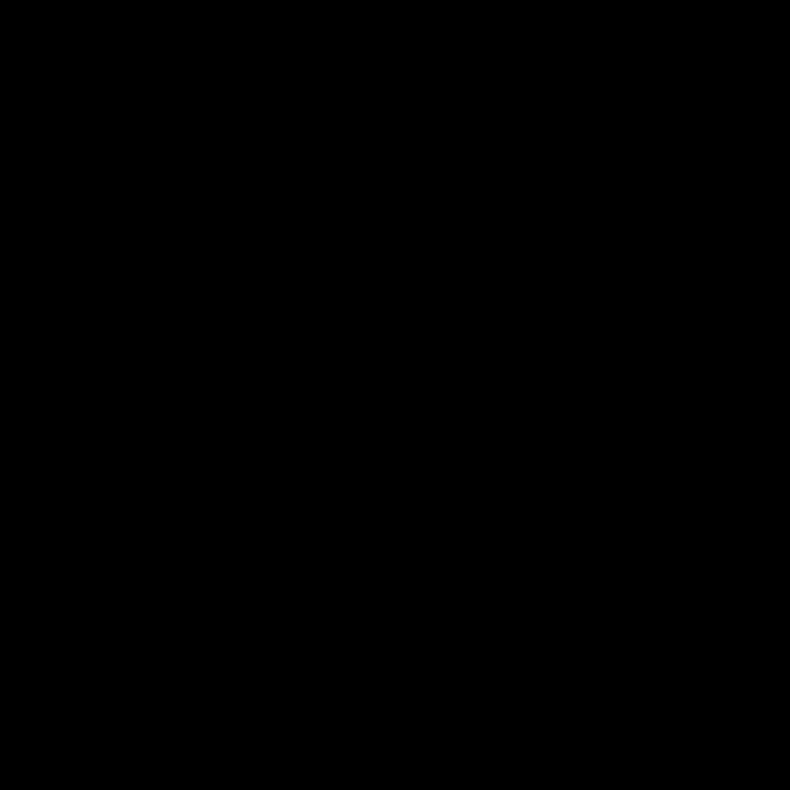

In [55]:
# There are n_time_step states of the system, each with three coordiantes, so we store the states in a n x 3 array
pos = np.zeros((n_time_steps, 3))

# Apply initial conditions
for i in range(3):
    pos[0, i] = r_vec_initial[i]

# The first element is determined by the initial conditions, so we update the i + 1st element
for i in range(n_time_steps - 1):
    pos[i + 1] = RK4(pos[i])

fig = plt.figure(facecolor=BACKGROUND_COLOR, figsize=(10,10))
fig.tight_layout()
ax = fig.add_subplot(111, projection="3d")

# Update function for the animation
def update(i):
    # Sets the viewpoint of the camera
    ax.view_init(-6, -56 + i/2) # + i/2 to rotate around the y-axis
    ax.clear()
    ax.set(facecolor=BACKGROUND_COLOR)
    ax.set_axis_off() # hides axes
    ax.plot(pos[:i, 0], pos[:i, 1], pos[:i, 2], color=PLOT_COLOR, linewidth=LW) # plot the trajectory up to the current point

ani = animation.FuncAnimation(fig, update, np.arange(15000), interval = 2, repeat = False)
plt.show()

